# Speed check

In [167]:
import time
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Cases for one function

In [133]:
def get_fibos(n, n_rec, s1=0, s2=1):

    def make_fibos(n, s1, s2, l):
        if n:
            l.append(s1)
            return make_fibos(n-1, s2, s1+s2, l)
        else:
            return l
    
    fibos = [s1, s2]
    for i in range(n//n_rec):
        fibos = make_fibos(n_rec+2, *fibos[-2:], fibos[:-2])

    return make_fibos(n%n_rec, *fibos[-2:], fibos[:-2])

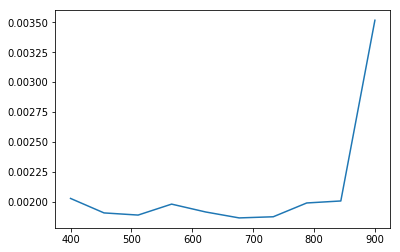

In [134]:
def report4function(function, args, cases):
    
    key = [key for key in cases.keys()][0]
    argss = []
    for case in cases[key]:
        temp_args = args.copy()
        temp_args.update({key: case})
        argss.append(temp_args)
    
    logdic = {args[key]: [] for args in argss}
    for args in argss:
        for _ in range(30):
            s = time.time()
            result = function(**args)
            logdic[args[key]].append(time.time()-s)
            
    df = pd.DataFrame(logdic)
    se = df.mean(axis=0)
    plt.plot(se)
    plt.show()

    
args = {"n": 5000}

start = 400
end = 900
cases = np.linspace(start, end, 10).tolist()
cases = {"n_rec": [int(case) for case in cases]} 
    
    
report4function(get_fibos, args, cases)

### Single case and many functions

In [157]:
def make_fibos(n, s1=0, s2=1, l=None):
    if not l:
        l = []    
    l.append(s1)
    return make_fibos(n-1, s2, s1+s2, l) if n-1 else l

def get_fibos(n, s1=0, s2=1):
    fibos = [s1, s2]
    for _ in range(n-2):
        temp = s2
        s2 = s1+s2
        s1 = temp
        fibos.append(s2)
    return fibos[:n]

In [166]:
def report4functions(functions, args):
    for f in functions:
        log = []
        for _ in range(30):
            s = time.time()
            f(**args)
            log.append(time.time()-s)
        print(sum(log))

    
functions = [make_fibos, get_fibos]
report4functions(functions, {"n": 100})

0.0009353160858154297
0.0004050731658935547
